In [1]:
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

### Add Overweight Column
##### To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [2]:
# Add 'overweight' column
df['bmi'] = (df.weight) / ((df.height/100)** 2)
df['overweight'] = df.bmi.apply(lambda x: 1 if x>25 else 0)
df.drop('bmi', axis=1)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


#### Normalize data 
##### By making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


In [3]:
# Normalize data 
df.cholesterol = df.cholesterol.apply(lambda x: 0 if x==1 else 1 if x>1 else x)
df.gluc = df.gluc.apply(lambda x: 0 if x==1 else 1 if x>1 else x)

### Draw Categorical Plot

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


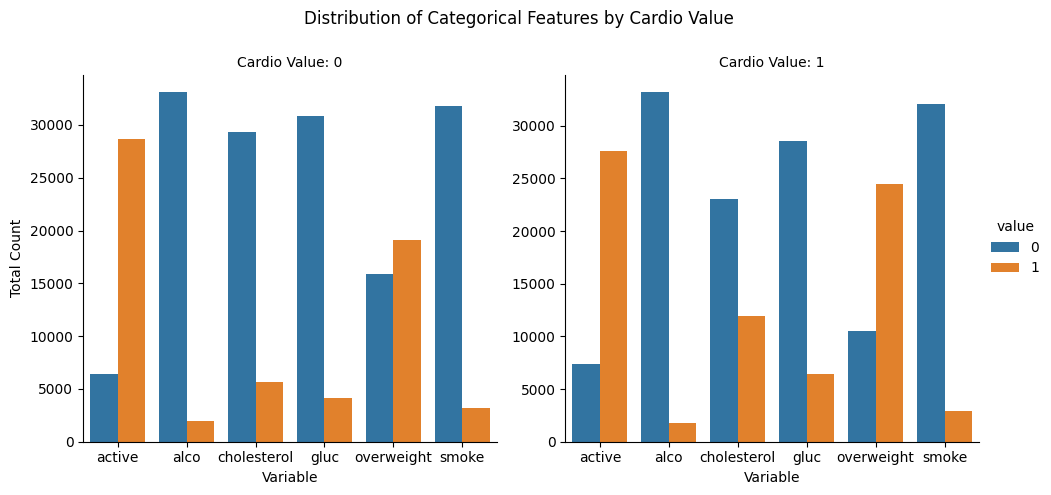

In [7]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
variables = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=variables, var_name='variable', value_name='value')


# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total_count')

    

# Draw the catplot with 'sns.catplot()'
# Get the figure for the output
fig = sns.catplot(data=df_cat, x='variable', y='total_count', hue='value', kind='bar', col='cardio', col_wrap=2, sharey=False)
    
    
# Set axes label and plot titles
fig.set_axis_labels("Variable", "Total Count")
fig.set_titles("Cardio Value: {col_name}")

# Adjust plot appearance
plt.subplots_adjust(top=0.85)
fig.fig.suptitle("Distribution of Categorical Features by Cardio Value")

fig.savefig('catplot.png')
fig

### Draw Heat Map

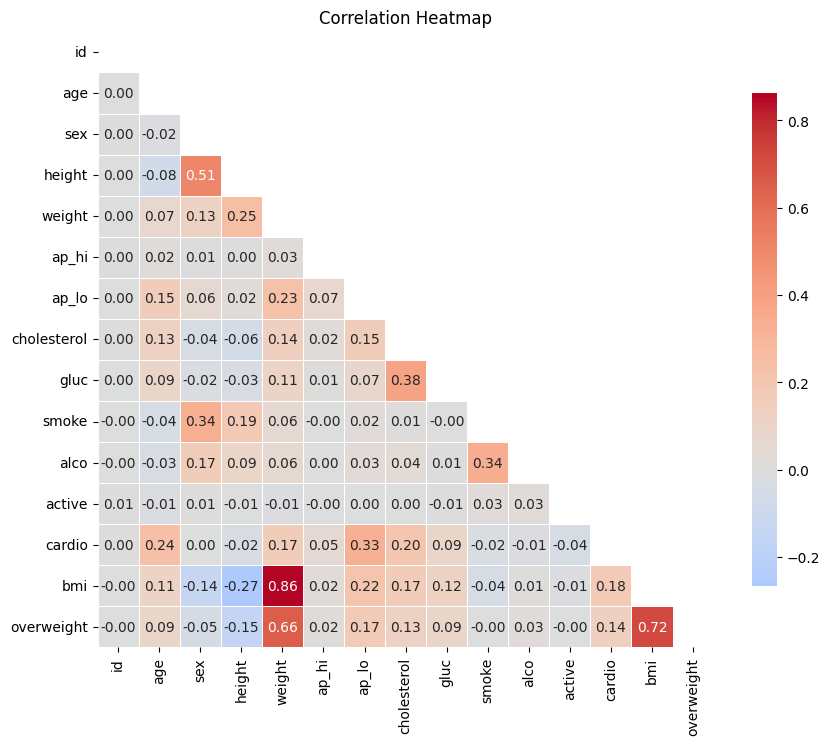

In [6]:
# Clean the data
df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})

# Set plot title
plt.title("Correlation Heatmap")

fig.savefig('heatmap.png')
